In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_path=r"C:\Users\Aniruddh Srivatsa\Pictures\gen\train"
validation_path=r"C:\Users\Aniruddh Srivatsa\Pictures\gen\validation"
test_path=r"C:\Users\Aniruddh Srivatsa\Pictures\gen\test"

In [3]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
IMG_SIZE=80

In [5]:
train_generator = train_datagen.flow_from_directory(
        train_path,  # This is the source directory for training images
        target_size=(IMG_SIZE,IMG_SIZE),  # All images will be resized to 120x120
        
        
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        validation_path,
        target_size=(IMG_SIZE,IMG_SIZE),
       
        class_mode='binary')

Found 1278 images belonging to 2 classes.
Found 246 images belonging to 2 classes.


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
    
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten,Dropout
from tensorflow.keras.layers import Conv2D,MaxPooling2D


model=Sequential()

model.add(Conv2D(32,(3,3),activation="relu",input_shape=(IMG_SIZE,IMG_SIZE,3)))

model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))


model.add(Flatten())

model.add(Dense(64,activation='relu'))

model.add(Dense(2,activation='softmax'))


model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 78, 78, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 39, 39, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 37, 37, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 18, 18, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2048)             

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
callbacks=EarlyStopping(patience=4,monitor="val_loss")

In [23]:
history=model.fit(train_generator,
          validation_data=validation_generator,
          epochs=20,callbacks=[callbacks])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 40 steps, validate for 8 steps
Epoch 1/20
40/40 [==============================] - 11s 279ms/step - loss: 0.6830 - accuracy: 0.5642 - val_loss: 0.6557 - val_accuracy: 0.6667
Epoch 2/20
40/40 [==============================] - 10s 248ms/step - loss: 0.6460 - accuracy: 0.6041 - val_loss: 0.6033 - val_accuracy: 0.6667
Epoch 3/20
40/40 [==============================] - 10s 247ms/step - loss: 0.6003 - accuracy: 0.6745 - val_loss: 0.6026 - val_accuracy: 0.7114
Epoch 4/20
40/40 [==============================] - 10s 244ms/step - loss: 0.5616 - accuracy: 0.7113 - val_loss: 0.5194 - val_accuracy: 0.7439
Epoch 5/20
40/40 [==============================] - 10s 244ms/step - loss: 0.5588 - accuracy: 0.7128 - val_loss: 0.4627 - val_accuracy: 0.8008
Epoch 6/20
40/40 [==============================] - 9s 234ms/step - loss: 0.4923 - accuracy: 0.7668 - val_loss: 0.4068 - val_accuracy: 0.8293
Epoch 7/20
40/40 [==============================] - 

In [24]:
test_generator=test_datagen.flow_from_directory(test_path,
        target_size=(IMG_SIZE,IMG_SIZE),
       
        class_mode='binary')

Found 20 images belonging to 1 classes.


In [25]:
model.evaluate_generator(validation_generator)

  ...
    to  
  ['...']


[0.3482283055782318, 0.86585367]

In [26]:
model.predict_generator(test_generator)

Instructions for updating:
Please use Model.predict, which supports generators.


array([[0.143277  , 0.856723  ],
       [0.9509247 , 0.0490753 ],
       [0.17298436, 0.82701564],
       [0.8056073 , 0.19439274],
       [0.99568814, 0.00431183],
       [0.9852084 , 0.01479163],
       [0.06424385, 0.9357562 ],
       [0.00417896, 0.995821  ],
       [0.00578025, 0.9942198 ],
       [0.11286515, 0.8871349 ],
       [0.73313355, 0.26686645],
       [0.03051291, 0.9694871 ],
       [0.59193295, 0.40806705],
       [0.9587457 , 0.04125425],
       [0.9975368 , 0.00246323],
       [0.96623236, 0.03376759],
       [0.21738015, 0.78261983],
       [0.859519  , 0.14048097],
       [0.8805004 , 0.11949959],
       [0.14499931, 0.8550008 ]], dtype=float32)

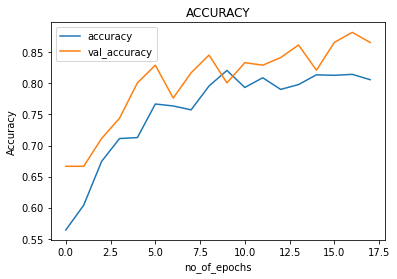

In [27]:
import numpy as np
import matplotlib.pyplot as plt

acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]
epochs=range(len(acc))
plt.xlabel("no_of_epochs")
plt.ylabel("Accuracy")
plt.plot(epochs,acc,label="accuracy")
plt.plot(epochs,val_acc,label="val_accuracy")
plt.title("ACCURACY")
plt.legend();

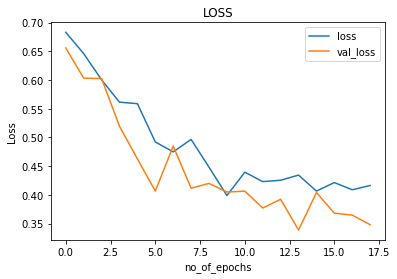

In [28]:
loss=history.history["loss"]
val_loss=history.history["val_loss"]
epochs=range(len(acc))
plt.xlabel("no_of_epochs")
plt.ylabel("Loss")
plt.plot(epochs,loss,label="loss")
plt.plot(epochs,val_loss,label="val_loss")
plt.title("LOSS")
plt.legend();

In [29]:
from tensorflow.keras.models import load_model
model.save(r"C:\Users\Aniruddh Srivatsa\Downloads\gender_class.h5")

In [30]:
from tensorflow.keras.models import load_model
loaded_model = load_model(r"C:\Users\Aniruddh Srivatsa\Downloads\gender_class.h5") 
loss, accuracy = loaded_model.evaluate_generator(validation_generator) 
print(loss,accuracy)

  ...
    to  
  ['...']
0.3482283055782318 0.86585367


In [3]:
pip install cvlib

Note: you may need to restart the kernel to use updated packages.


'C:\Users\Aniruddh' is not recognized as an internal or external command,
operable program or batch file.


In [33]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np

import cv2
import os
import cvlib as cv
                    

# open webcam
webcam = cv2.VideoCapture(0)
    
classes = ['man','woman']

# loop through frames
while webcam.isOpened():

    # read frame from webcam 
    status, frame = webcam.read()

    # apply face detection
    face, confidence = cv.detect_face(frame)


    # loop through detected faces
    for idx, f in enumerate(face):

        # get corner points of face rectangle        
        (startX, startY) = f[0], f[1]
        (endX, endY) = f[2], f[3]

        # draw rectangle over face
        cv2.rectangle(frame, (startX+10,startY+10), (endX+10,endY+10), (0,255,0), 2)

        # crop the detected face region
        face_crop = np.copy(frame[startY+22:endY+22,startX+22:endX+22])

        if (face_crop.shape[0]) < 10 or (face_crop.shape[1]) < 10:
            continue

        # preprocessing for gender detection model
        face_crop = cv2.resize(face_crop, (80,80))
        face_crop = face_crop.astype("float") / 255.0
        face_crop = img_to_array(face_crop)
        face_crop = np.expand_dims(face_crop, axis=0)

        # apply gender detection on face
        conf = loaded_model.predict(face_crop)[0] # model.predict return a 2D matrix, ex: [[9.9993384e-01 7.4850512e-05]]

        # get label with max accuracy
        idx = np.argmax(conf)
        label = classes[idx]

        label = "{}: {:.2f}%".format(label, conf[idx] * 100)

        Y = startY - 10 if startY - 10 > 10 else startY + 10

        # write label and confidence above face rectangle
        cv2.putText(frame, label, (startX, Y),  cv2.FONT_HERSHEY_SIMPLEX,
                    0.7, (0, 255, 0), 2)
        print("label: ",label,"probability: ", loaded_model.predict(face_crop)[0])
    # display output
    cv2.imshow("gender detection", frame)

    # press "Q" to stop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# release resources
webcam.release()
cv2.destroyAllWindows()

label:  man: 98.12% probability:  [0.98122233 0.01877765]
label:  man: 98.44% probability:  [0.98440856 0.01559147]
label:  man: 98.85% probability:  [0.98853546 0.0114645 ]
label:  man: 97.75% probability:  [0.9775204  0.02247956]
label:  man: 98.69% probability:  [0.98690623 0.01309374]
label:  man: 98.84% probability:  [0.9883918 0.0116082]
label:  man: 97.31% probability:  [0.97312295 0.02687706]
label:  man: 98.44% probability:  [0.9844281  0.01557191]
label:  man: 98.41% probability:  [0.9841388  0.01586117]
label:  man: 98.09% probability:  [0.98085314 0.01914686]
label:  man: 98.94% probability:  [0.98936814 0.01063181]
label:  man: 98.89% probability:  [0.988927   0.01107296]
label:  man: 98.48% probability:  [0.98475283 0.01524718]
label:  man: 89.75% probability:  [0.8975468  0.10245322]
label:  man: 87.85% probability:  [0.87853044 0.12146962]
label:  man: 95.78% probability:  [0.9577653  0.04223476]
label:  man: 95.20% probability:  [0.95195764 0.04804236]
label:  man: 96.